In [1]:
import pypbp as pbp
import matplotlib.pyplot as plt
import numpy as np
#import emdx
from sklearn.metrics import confusion_matrix
import pandas as pd
from scipy.spatial.distance import euclidean, canberra

# Loading the data

In [2]:
time_series = pbp.time_series

# Get_decomposition function

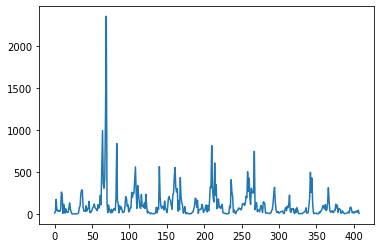

In [3]:
plt.plot(time_series)

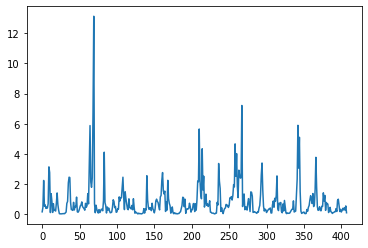

In [ ]:
emd = pbp.get_decomposition(time_series)
plt.plot(emd)

# obtain_patterns funciton

In [5]:
patterns, target = pbp.obtain_patterns(observation_set = time_series, 
                               event = 200, m = 5, decompose = True, 
                               decomposition_function = pbp.get_decomposition)

# Pattern_Matrix

In [6]:
pattern_matrix = pbp.Pattern_Matrix()
clustered_patterns = pattern_matrix.obtain_pc_with_distance(P = patterns, 
                                                            d_cluster = 0.2)


# Prediction function

In [8]:
prediction = pbp.Prediction()        
prediction.obtain_p_means_with_distance(field_sample = 
                                        clustered_patterns[1][0][1,:],  
                                        patterns = clustered_patterns)
prediction.predict_with_distance(d_base = 0.1, alpha = 2)

1

In [9]:
pbp_predictions = pbp.pbp_prediction(patterns_array=patterns, 
                                 clustered_patterns = clustered_patterns, 
                                 d_base = 0.4, alpha = 1, 
                                 outbreak_p_means = prediction.obtain_p_means_with_distance,
                                 outbreak_prediction = prediction.predict_with_distance)

# Obtaining True and False positive rate

In [9]:
cm = confusion_matrix(y_pred=pbp_predictions, 
                      y_true = target)
pbp.check_zero_division(cm)
pbp.check_and_compute_rates(predictions=pbp_predictions, 
                            classes = target, 
                            cm = cm)

(0.25806451612903225, 0.22287390029325513)

In [10]:
pbp.get_rates(predictions=pbp_predictions, 
                            classes = target)

(0.25806451612903225, 0.22287390029325513)

## Performing K-Fold cross validation

In [11]:
pbp.get_rates_by_cross_validation(patterns = patterns, 
                              classes = target, 
                              d_cluster = 0.4, 
                              d_base = 0.1, 
                              alpha = 1)

(1.0, 1.0)

In [12]:
pbp.get_auroc(v = [4, 1, 1], 
          time_series = time_series, 
          xstar = 200, 
          decompose = False,
          verbose = True,
          decomposition_function = pbp.get_decomposition)

Obtain Area of Roc curve of 0.5


-0.5

In [14]:
result = pbp.dual_anneling_optim(time_series = time_series, 
                        xstar = 200, 
                        decompose = False, 
                        decomposition_function = pbp.get_decomposition,
                        maxfun = 1,
                        verbose = True, 
                        bounds = [[1, 7], [0.1, 0.5], [0.5, 1.5]])

Obtain Area of Roc curve of 0.7108937495253285
Obtain Area of Roc curve of 0.6866912899531281


In [15]:
result

{'m': 5,
 'd_cluster': 0.1302432380665553,
 'alpha': 1.4266697129133354,
 'auroc': 0.7108937495253285}

In [16]:
parameters, data = pbp.get_fitted_parameters(time_series = time_series, 
                          xstar = 200, 
                          decompose = True, 
                          maxfun = 5,
                          verbose = True, 
                          decomposition_function = pbp.get_decomposition)

Obtain Area of Roc curve of 0.6476638850083826
Obtain Area of Roc curve of 0.8447309745179064
Obtain Area of Roc curve of 0.7918668068839462
Obtain Area of Roc curve of 0.7186653937589603
Obtain Area of Roc curve of 0.8235100766671412


In [17]:
pbp.get_d_base(data = data, 
           rate_type = 'fpr',
           rate_threshold = 0.1)

{'d_base': 0.7000000000000001, 'rate_threshold': 0.1}

In [18]:
pbp.get_method_statiscs(predictions = pbp_predictions, 
                        classes = target)

{'accuracy': 0.6972704714640199,
 'precision': 0.17391304347826086,
 'recall': 0.25806451612903225,
 'tpr': 0.25806451612903225,
 'fpr': 0.22287390029325513,
 'f1': 0.2077922077922078}

# Fit function

In [19]:
results, xstar, clustered_patterns = pbp.pbp_fit(time_series = time_series, 
            train_percentage = 0.8, 
            xstar = 200)

In [13]:
results

,Model,Decomposition,Criteria,Threshold,Acc,FI-Score,Precision,Recall,Tpr,Fpr,m,d_cluster,Alpha,ROC,d_base,updated_threshold,xstar,split
0,Real,No,tpr,0.9,0.835443,0.380952,0.235294,1.00,1.00,0.173333,2.0,0.39602,0.763315,0.901667,0.5,0.9,200.0,0.8
0,Real,No,tpr,0.8,0.949367,0.600000,0.500000,0.75,0.75,0.040000,2.0,0.39602,0.763315,0.901667,0.6,0.8,200.0,0.8
0,Real,No,fpr,0.2,0.949367,0.600000,0.500000,0.75,0.75,0.040000,2.0,0.39602,0.763315,0.901667,0.6,0.2,200.0,0.8
0,Real,No,fpr,0.1,0.949367,0.333333,0.500000,0.25,0.25,0.013333,2.0,0.39602,0.763315,0.901667,0.7,0.1,200.0,0.8


# Reproducing paper results

In [5]:
results04, xstar04, clustered_patterns04, parameters04 = pbp.pbp_fit(time_series = time_series, 
            train_percentage = 0.4, 
            xstar = 200, 
            maxfun = 1000)

In [6]:
results04

,Model,Decomposition,Criteria,Threshold,Acc,FI-Score,Precision,Recall,Tpr,Fpr,m,d_cluster,Alpha,ROC,d_base,updated_threshold,xstar,split
0,Real,No,tpr,0.9,0.185185,0.214286,0.120000,1.000000,1.000000,0.916667,1.0,0.177517,1.169197,0.720182,0.5,0.9,200.0,0.4
0,Real,No,tpr,0.8,0.185185,0.214286,0.120000,1.000000,1.000000,0.916667,1.0,0.177517,1.169197,0.720182,0.5,0.8,200.0,0.4
0,Real,No,fpr,0.2,0.880658,0.491228,0.466667,0.518519,0.518519,0.074074,1.0,0.177517,1.169197,0.720182,0.8,0.2,200.0,0.4
0,Real,No,fpr,0.1,0.880658,0.491228,0.466667,0.518519,0.518519,0.074074,1.0,0.177517,1.169197,0.720182,0.8,0.1,200.0,0.4


In [ ]:
results05, xstar05, clustered_patterns05, parameters05 = pbp.pbp_fit(time_series = time_series, 
            train_percentage = 0.5, 
            xstar = 200, 
            maxfun = 200)

In [ ]:
results05

,Model,Decomposition,Criteria,Threshold,Acc,FI-Score,Precision,Recall,Tpr,Fpr,m,d_cluster,Alpha,ROC,d_base,updated_threshold,xstar,split
0,Real,No,tpr,0.9,0.835821,0.521739,0.418605,0.692308,0.692308,0.142857,2.0,0.39602,0.763315,0.8495,0.6,0.9,200.0,0.5
0,Real,No,tpr,0.8,0.835821,0.521739,0.418605,0.692308,0.692308,0.142857,2.0,0.39602,0.763315,0.8495,0.6,0.8,200.0,0.5
0,Real,No,fpr,0.2,0.855721,0.325581,0.411765,0.269231,0.269231,0.057143,2.0,0.39602,0.763315,0.8495,0.7,0.2,200.0,0.5
0,Real,No,fpr,0.1,0.855721,0.325581,0.411765,0.269231,0.269231,0.057143,2.0,0.39602,0.763315,0.8495,0.7,0.1,200.0,0.5


In [10]:
results06, xstar06, clustered_patterns06, parameters06 = pbp.pbp_fit(time_series = time_series, 
            train_percentage = 0.6, 
            xstar = 200, 
            maxfun = 1000)

In [12]:
results06

,Model,Decomposition,Criteria,Threshold,Acc,FI-Score,Precision,Recall,Tpr,Fpr,m,d_cluster,Alpha,ROC,d_base,updated_threshold,xstar,split
0,Real,No,tpr,0.9,0.590062,0.326531,0.195122,1.00,1.00,0.455172,2.0,0.177517,1.169197,0.774167,0.4,0.9,200.0,0.6
0,Real,No,tpr,0.8,0.590062,0.326531,0.195122,1.00,1.00,0.455172,2.0,0.177517,1.169197,0.774167,0.4,0.8,200.0,0.6
0,Real,No,fpr,0.2,0.906832,0.615385,0.521739,0.75,0.75,0.075862,2.0,0.177517,1.169197,0.774167,0.6,0.2,200.0,0.6
0,Real,No,fpr,0.1,0.906832,0.615385,0.521739,0.75,0.75,0.075862,2.0,0.177517,1.169197,0.774167,0.6,0.1,200.0,0.6


In [71]:
results06

,Model,Decomposition,Criteria,Threshold,Acc,FI-Score,Precision,Recall,Tpr,Fpr,m,d_cluster,Alpha,ROC,d_base,updated_threshold,xstar,split
0,Real,No,tpr,0.9,0.826087,0.500000,0.35,0.8750,0.8750,0.179310,2.0,0.388062,0.58856,0.805982,0.5,0.9,200.0,0.6
0,Real,No,tpr,0.8,0.826087,0.500000,0.35,0.8750,0.8750,0.179310,2.0,0.388062,0.58856,0.805982,0.5,0.8,200.0,0.6
0,Real,No,fpr,0.2,0.881988,0.536585,0.44,0.6875,0.6875,0.096552,2.0,0.388062,0.58856,0.805982,0.6,0.2,200.0,0.6
0,Real,No,fpr,0.1,0.900621,0.200000,0.50,0.1250,0.1250,0.013793,2.0,0.388062,0.58856,0.805982,0.8,0.1,200.0,0.6


In [11]:
results07, xstar07, clustered_patterns07, parameters07 = pbp.pbp_fit(time_series = time_series, 
            train_percentage = 0.7, 
            xstar = 200, 
            maxfun = 1000)

In [12]:
results07

,Model,Decomposition,Criteria,Threshold,Acc,FI-Score,Precision,Recall,Tpr,Fpr,m,d_cluster,Alpha,ROC,d_base,updated_threshold,xstar,split
0,Real,No,tpr,0.9,0.875000,0.400000,0.277778,0.714286,0.714286,0.115044,2.0,0.397491,0.504038,0.852769,0.5,0.9,200.0,0.7
0,Real,No,tpr,0.8,0.916667,0.375000,0.333333,0.428571,0.428571,0.053097,2.0,0.397491,0.504038,0.852769,0.6,0.8,200.0,0.7
0,Real,No,fpr,0.2,0.941667,0.363636,0.500000,0.285714,0.285714,0.017699,2.0,0.397491,0.504038,0.852769,0.7,0.2,200.0,0.7
0,Real,No,fpr,0.1,0.941667,0.363636,0.500000,0.285714,0.285714,0.017699,2.0,0.397491,0.504038,0.852769,0.7,0.1,200.0,0.7


In [5]:
results08, xstar08, clustered_patterns08, parameters08 = pbp.pbp_fit(time_series = time_series, 
            train_percentage = 0.8, 
            xstar = 200, 
            maxfun = 10)

In [6]:
results08

,Model,Decomposition,Criteria,Threshold,Acc,FI-Score,Precision,Recall,Tpr,Fpr,m,d_cluster,Alpha,ROC,d_base,updated_threshold,xstar,split
0,Real,No,tpr,0.9,0.835443,0.380952,0.235294,1.00,1.00,0.173333,2.0,0.39602,0.763315,0.901667,0.5,0.9,200.0,0.8
0,Real,No,tpr,0.8,0.949367,0.600000,0.500000,0.75,0.75,0.040000,2.0,0.39602,0.763315,0.901667,0.6,0.8,200.0,0.8
0,Real,No,fpr,0.2,0.949367,0.600000,0.500000,0.75,0.75,0.040000,2.0,0.39602,0.763315,0.901667,0.6,0.2,200.0,0.8
0,Real,No,fpr,0.1,0.949367,0.333333,0.500000,0.25,0.25,0.013333,2.0,0.39602,0.763315,0.901667,0.7,0.1,200.0,0.8


# Pattern visualisation

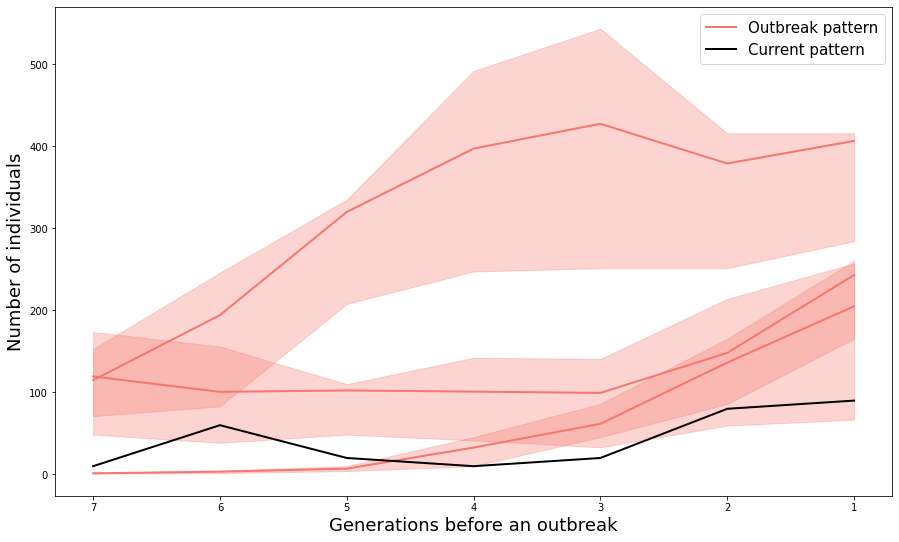

In [16]:
a = pbp.pbp_plot(time_series = time_series, clustered_patterns = clustered_patterns05, 
             parameters = parameters05, 
             xnew = [10., 60., 20., 10., 20., 80., 90.])

In [28]:
parameters05

{'m': 7,
 'd_cluster': 0.19880907592368005,
 'alpha': 0.7478052377700806,
 'auroc': -0.95,
 'd_base': 0.30000000000000004}

In [42]:
a.savefig(fname = 'PypbpPlot.png', dpi = 400)

In [12]:
clustered_patterns = clustered_patterns05 
xstar = 200
parameters = parameters05
patterns, target = pbp.obtain_patterns(observation_set = time_series, 
                                   event = xstar, m = parameters['m'], decompose = False, 
                                   decomposition_function = pbp.get_decomposition)
# Classifying outbreaks    
prediction = pbp.Prediction()        
prediction.obtain_p_means_with_distance(field_sample = 
                                        clustered_patterns[1][0][1,:],  
                                        patterns = clustered_patterns)
prediction.predict_with_distance(d_base = 0.1, alpha = 2)
pbp_predictions = np.array(pbp.pbp_prediction(patterns_array=np.array([[10., 60., 20., 10., 20., 80., 90.], 
                                                                       [10., 60., 20., 10., 20., 80., 90.]]), 
                                 clustered_patterns = clustered_patterns, 
                                 d_base = parameters['d_base'], alpha = parameters['alpha'], 
                                 outbreak_p_means = prediction.obtain_p_means_with_distance,
                                 outbreak_prediction = prediction.predict_with_distance))

In [13]:
print(pbp.get_d_pred(d_base = parameters['d_base'], alpha = parameters['alpha'], l = 22))
print(pbp.get_d_pred(d_base = parameters['d_base'], alpha = parameters['alpha'], l = 3))
print(pbp.get_d_pred(d_base = parameters['d_base'], alpha = parameters['alpha'], l = 11))

0.3693788986013806
0.6078252680331424
0.4165035525985523


In [14]:
pmean1 = np.mean(clustered_patterns05[1][0])
pmean2 = np.mean(clustered_patterns05[1][1])
pmean3 = np.mean(clustered_patterns05[1][2])

In [15]:
print(1/(canberra(pmean1, [10., 60., 20., 10., 20., 80., 90.]) + 1))
print(1/(canberra(pmean2, [10., 60., 20., 10., 20., 80., 90.]) + 1))
print(1/(canberra(pmean3, [10., 60., 20., 10., 20., 80., 90.]) + 1))

0.2008530926185582
0.26190241408936754
0.15411210919999635
